Importando bibliotecas necessárias para o desenvolvimento

In [100]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

Criando variáveis e consumindo a API da Nasa

In [101]:
api_key = '2A2nf4ZGr0WgpzKNFF16W9clGhMaP1OTpnc9RgOF'
base_url = 'https://api.nasa.gov/neo/rest/v1/feed'

start_date = (datetime.now() - timedelta(days=7)).strftime('%Y-%m-%d')
end_date = datetime.now().strftime('%Y-%m-%d')

params = {
    'start_date': start_date,
    'end_date': end_date,
    'api_key': api_key
}

response = requests.get(base_url, params=params)
data = response.json()

Visualizando como a API está distribuída


Tratando a api e gerando uma lista com os dados que foram selecionados

In [103]:
asteroids = []
for date, asteroids_list in data['near_earth_objects'].items():
    for asteroid in asteroids_list:
        asteroids.append({
            'name': asteroid['name'],
            'close_approach_date': date,
            'velocity_kmh': asteroid['close_approach_data'][0]['relative_velocity']['kilometers_per_hour'],
            'estimated_diameter_min': asteroid['estimated_diameter']['meters']['estimated_diameter_min'],
            'estimated_diameter_max': asteroid['estimated_diameter']['meters']['estimated_diameter_max'],
            "miss_distance_km": asteroid['close_approach_data'][0]['miss_distance']['kilometers'],
            'is_potentially_hazardous': asteroid['is_potentially_hazardous_asteroid']
        })

Criando o DataFrame a partir da lista 'asteroids'

In [104]:
df_asteroids = pd.DataFrame(asteroids)

Visualizando as primeiras linhas

In [105]:
df_asteroids.head()

,name,close_approach_date,velocity_kmh,estimated_diameter_min,estimated_diameter_max,miss_distance_km,is_potentially_hazardous
0,412977 (1990 UO),2024-10-20,148185.7480262956,324.007435,724.502651,69887104.254764291,False
1,495615 (2015 PQ291),2024-10-20,82317.0440716297,766.575574,1714.115092,52394019.758446318,False
2,526742 (2006 WR127),2024-10-20,53453.4606550249,212.106988,474.285643,41208195.072126918,False
3,(2014 US115),2024-10-20,68985.4822516714,31.956189,71.456210,57336403.669540838,False
4,(2015 KG19),2024-10-20,27404.305513672,55.789822,124.749835,33890943.164648171,False


Visualizando informações sobre o DataFrame, como o tipo de dado de cada coluna

In [106]:
df_asteroids.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   name                      154 non-null    object 
 1   close_approach_date       154 non-null    object 
 2   velocity_kmh              154 non-null    object 
 3   estimated_diameter_min    154 non-null    float64
 4   estimated_diameter_max    154 non-null    float64
 5   miss_distance_km          154 non-null    object 
 6   is_potentially_hazardous  154 non-null    bool   
dtypes: bool(1), float64(2), object(4)
memory usage: 7.5+ KB


Ajustando o tipo de dados para as colunas necessárias

In [107]:
df_asteroids['close_approach_date'] = pd.to_datetime(df_asteroids['close_approach_date'])

df_asteroids['miss_distance_km'] = df_asteroids['miss_distance_km'].astype('float64')

df_asteroids['velocity_kmh'] = df_asteroids['velocity_kmh'].astype('float64')

Descrição estatítisca dos dados das colunas de data e numéricas

In [108]:
df_asteroids.describe()

,close_approach_date,velocity_kmh,estimated_diameter_min,estimated_diameter_max,miss_distance_km
count,154,154.000000,154.000000,154.000000,1.540000e+02
mean,2024-10-22 03:44:24.935064832,44937.962640,93.953946,210.087411,3.245644e+07
min,2024-10-19 00:00:00,4966.978391,2.731209,6.107170,4.636481e+04
25%,2024-10-20 00:00:00,28716.141426,18.434951,41.221803,1.289759e+07
50%,2024-10-22 00:00:00,42411.983556,39.680158,88.727532,3.061123e+07
75%,2024-10-24 00:00:00,55778.474189,94.635883,211.612268,5.273305e+07
max,2024-10-26 00:00:00,148185.748026,996.678240,2228.640296,7.363303e+07
std,NaN,22935.845485,154.941919,346.460665,2.303389e+07


### Primeira Análise - Número de Asteróides que passaram próximo da Terra

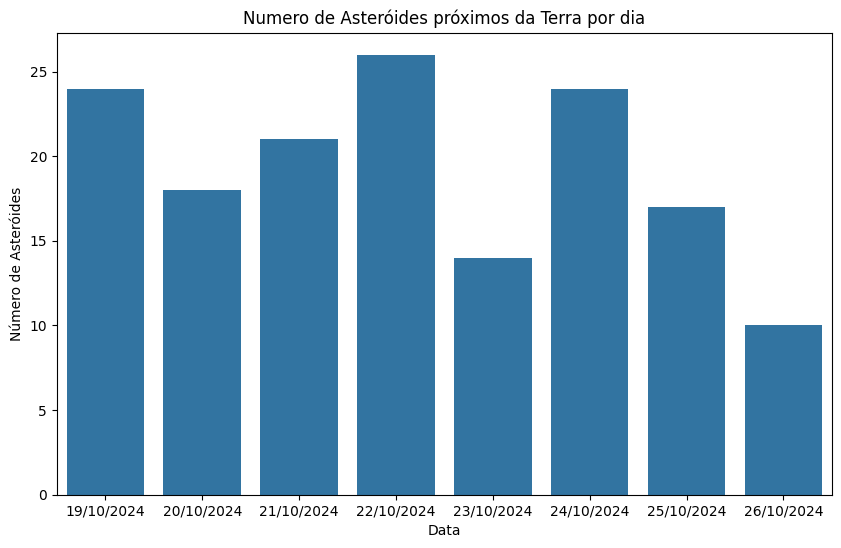

In [122]:
asteroids_per_day = df_asteroids['close_approach_date'].value_counts().sort_index()
asteroids_per_day.index = asteroids_per_day.index.strftime('%d/%m/%Y')
plt.figure(figsize=(10,6))
sns.barplot(x=asteroids_per_day.index, y=asteroids_per_day.values)
plt.title('Numero de Asteróides próximos da Terra por dia')
plt.xlabel('Data')
plt.ylabel('Número de Asteróides')
plt.show()

### Segunda Análise - Proporção de ateroides perigosos/não perigosos á Terra

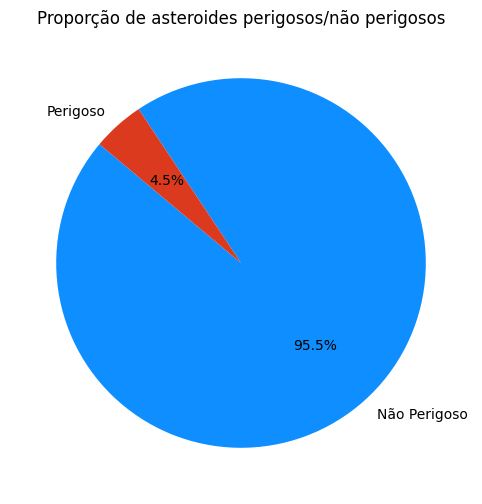

In [121]:
plt.figure(figsize=(12, 6))
hazardous_count = df_asteroids['is_potentially_hazardous'].value_counts()
plt.pie(hazardous_count, labels=['Não Perigoso', 'Perigoso'], autopct='%1.1f%%', startangle=140, colors=['#0E8EFF', '#DB3A1E'])
plt.title('Proporção de asteroides perigosos/não perigosos')
plt.show()

### Terceira Análise - Visualizando correlação entre Menor distância e velocidade

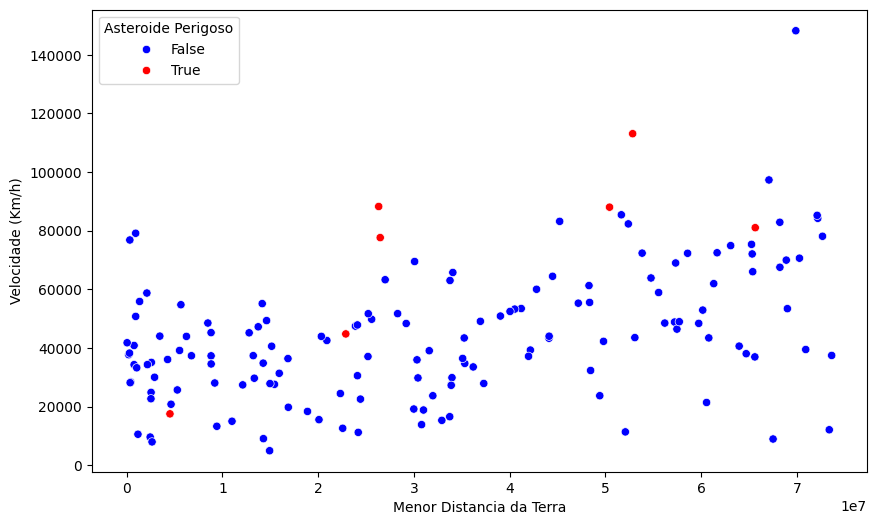

In [120]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='miss_distance_km', y='velocity_kmh', hue='is_potentially_hazardous', 
                data=df_asteroids, palette={True: 'red', False: 'blue'})
plt.xlabel('Menor Distancia da Terra')
plt.ylabel('Velocidade (Km/h)')
plt.legend(title='Asteroide Perigoso')
plt.show()

### Quarta Análise - Visualizando a distribuição de diametro máximo dos asteroides

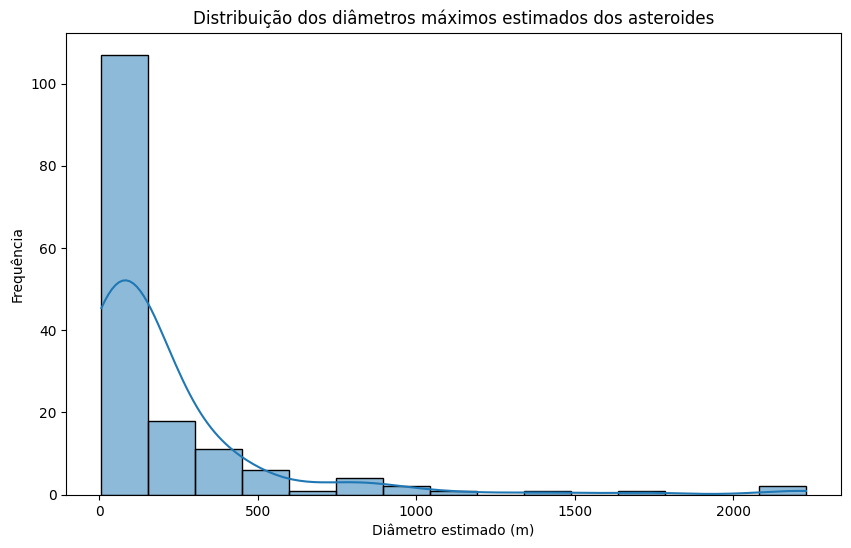

In [112]:
plt.figure(figsize=(10, 6))
sns.histplot(df_asteroids['estimated_diameter_max'], kde=True, bins=15)
plt.title('Distribuição dos diâmetros máximos estimados dos asteroides')
plt.xlabel('Diâmetro estimado (m)')
plt.ylabel('Frequência')
plt.show()

### Quinta Análise - Vendo a distribuição das velocidades

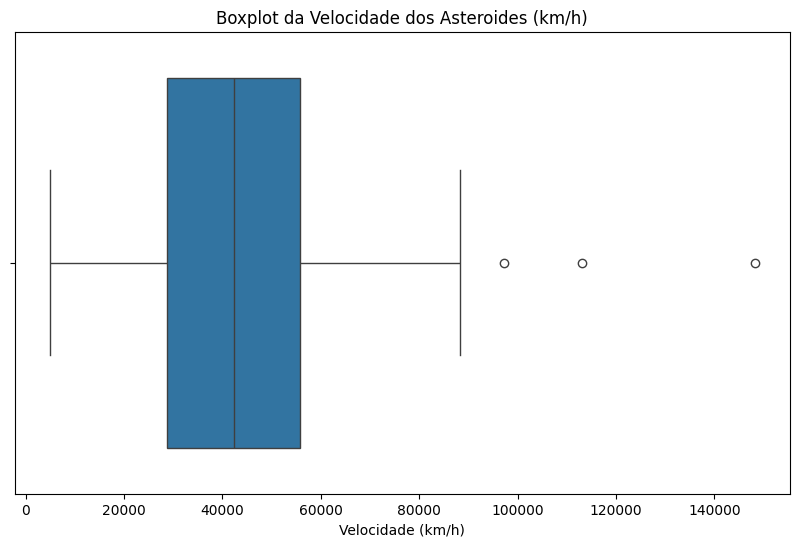

In [119]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='velocity_kmh', data=df_asteroids)
plt.title('Boxplot da Velocidade dos Asteroides (km/h)')
plt.xlabel('Velocidade (km/h)')
plt.show()